# Results

## Contour Compatibility

### Corpus

Conser's Aeschylus: **80.2%** compatibility.

For Aristophanes: ≈ **82.0**!

In [30]:
from src.comp import compatibility_corpus, compatibility_ratios_to_stats

all_sets = compatibility_corpus('data/compiled/')
total_comp = compatibility_ratios_to_stats(all_sets)

print(f'Total compatibility: {total_comp}')
print(all_sets)


Total compatibility: 0.8200102485267743
[[[[0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0], [0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 1.0], [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0], [0.6666666666666666, 1.0, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 1.0], [1.0, 1.0, 0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.6666666666666666], [0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 1.0, 1.0, 1.0, 1.0, 0.6666

#### By Position (Sedes)

Average by position (out of 52): [0.8, 0.81, 0.83, 0.8, 0.81, 0.83, 0.82, 0.86, 0.81, 0.8, 0.82, 0.85, 0.82, 0.8, 0.88, 0.84, 0.79, 0.8, 0.84, 0.82, 0.85, 0.87, 0.78, 0.82, 0.84, 0.81, 0.83, 0.92, 0.8, 0.73, 0.88, 0.77, 0.83, 0.7, 0.8, 0.75, 0.67, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.75, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5]


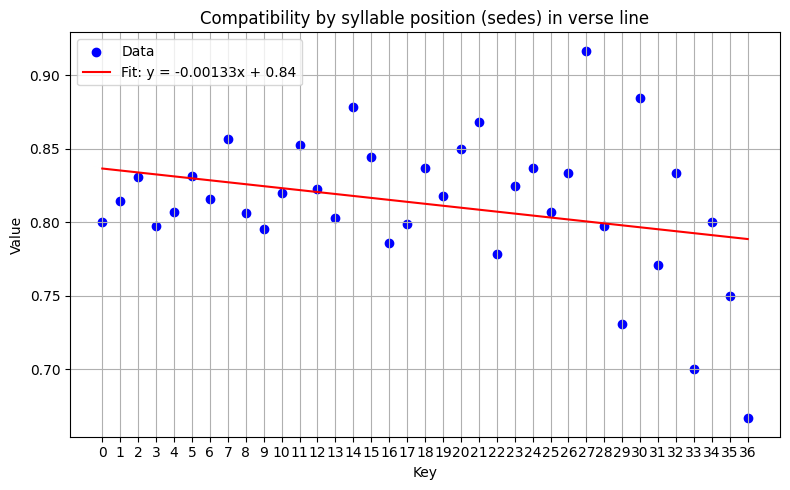

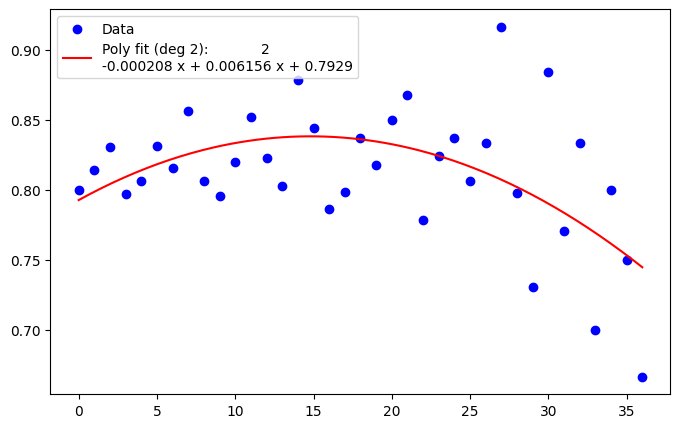

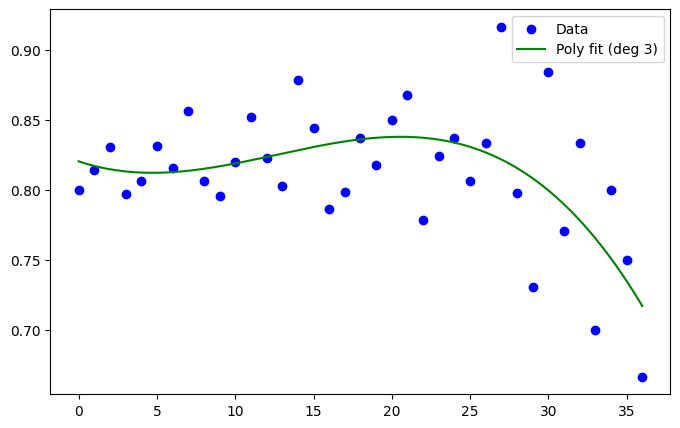

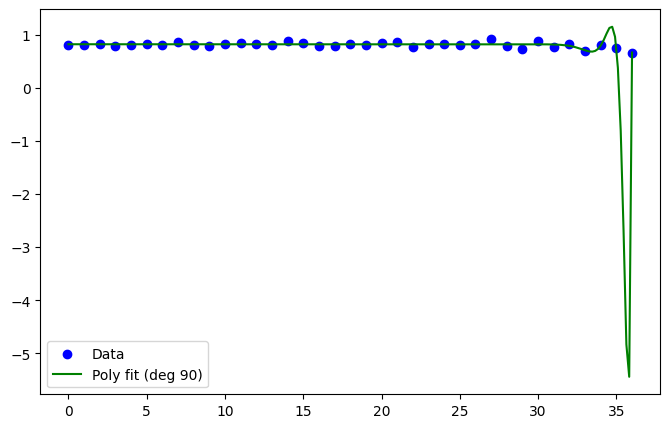

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from src.comp import compatibility_corpus, compatibility_ratios_to_stats

def average_by_index(nested):
    # Flatten to get all innermost lists (depth 4)
    def collect_lists(x):
        if isinstance(x, list) and all(isinstance(i, (int, float)) for i in x):
            return [x]
        elif isinstance(x, list):
            result = []
            for item in x:
                result.extend(collect_lists(item))
            return result
        return []

    all_lists = collect_lists(nested)

    # Collect values per index
    sums = defaultdict(float)
    counts = defaultdict(int)

    for lst in all_lists:
        for i, val in enumerate(lst):
            sums[i] += val
            counts[i] += 1

    max_index = max(sums.keys(), default=-1)
    averages = [(sums[i] / counts[i]) if counts[i] > 0 else None for i in range(max_index + 1)]

    return averages

all_sets = compatibility_corpus('data/compiled/')

average_by_position = average_by_index(all_sets)

rounded = [round(x, 2) if x is not None else None for x in average_by_position]
print(f'Average by position (out of {len(rounded)}): {rounded}')

def linear_regression_plays(data, title):
    # Convert string keys to numerical indices
    x = list(range(len(data)))  # or use: list(enumerate(data))[i][0] if needed
    y = data
    labels = x

    # Linear regression
    slope, intercept, *_ = linregress(x, y)
    regression_line = [slope * xi + intercept for xi in x]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, regression_line, label=f'Fit: y = {slope:.5f}x + {intercept:.2f}', color='red')

    # Replace x-axis ticks with original labels
    plt.xticks(ticks=x, labels=labels)
    plt.xlabel('Key')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    ### Polynomial regression with numpy

    # Data
    x = np.array(x)  # ensure numpy array
    y = np.array(y)

    # Polynomial regression of degree 2 (quadratic)
    degree = 2
    coeffs = np.polyfit(x, y, degree)
    poly = np.poly1d(coeffs)

    # Regression line
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = poly(x_fit)

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label=f'Poly fit (deg {degree}): {poly}', color='red')
    plt.legend()
    plt.show()

    ### Polynomial regression with sklearn

    # Transform to polynomial features
    degree = 3
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x[:, np.newaxis], y)

    # Prediction
    x_fit = np.linspace(min(x), max(x), 200)
    y_fit = model.predict(x_fit[:, np.newaxis])

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x_fit, y_fit, label=f'Poly fit (deg {degree})', color='green')
    plt.legend()
    plt.show()

linear_regression_plays(average_by_position[:37], 'Compatibility by syllable position (sedes) in verse line')

### Play

	ach:	0.8170377541142304
	eq:	0.8115438108484005
	nu:	0.82
	v:	0.817450495049505
	pax:	0.82531328320802
	av:	0.8145285935085008
	lys:	0.8303571428571429
	th:	0.812807881773399
	ra:	0.8106603023070803
	ec:	0.8257142857142857
	pl:	0.8900709219858156


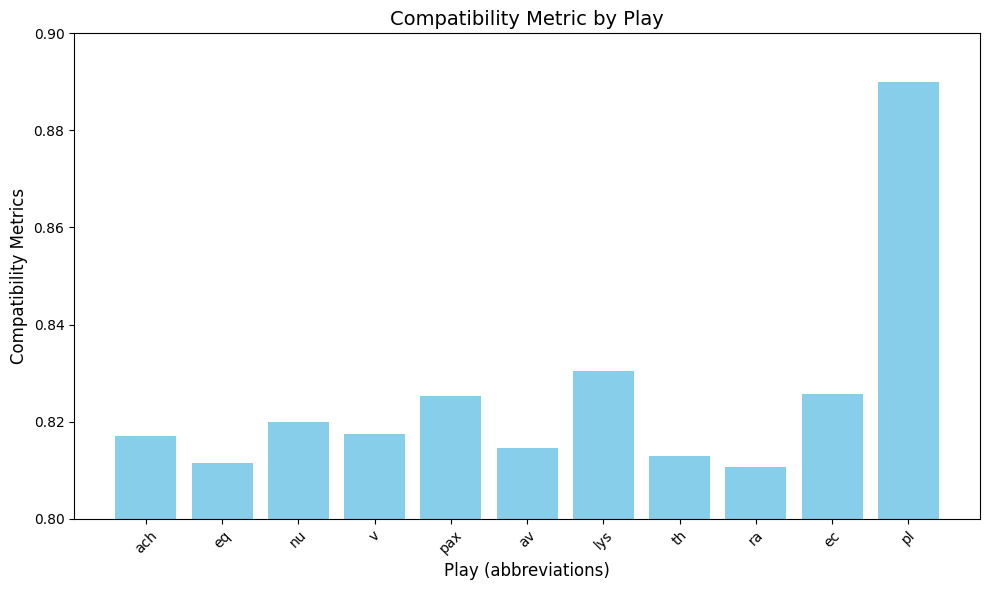

In [2]:
from src.comp import compatibility_play, compatibility_ratios_to_stats
from src.plot.plot import plot_dict
from src.utils.utils import abbreviations

def prepare_compatibility_stat(abbreviation):
    list = compatibility_play(f'data/compiled/responsion_{abbreviation}_compiled.xml')
    return compatibility_ratios_to_stats(list)

play_dict = {}
for play in abbreviations:
    play_dict[play] = prepare_compatibility_stat(play)
    print(f'\t{play}:\t{play_dict[play]}')

plot_dict(play_dict, y_start=0.8, y_end=0.9)




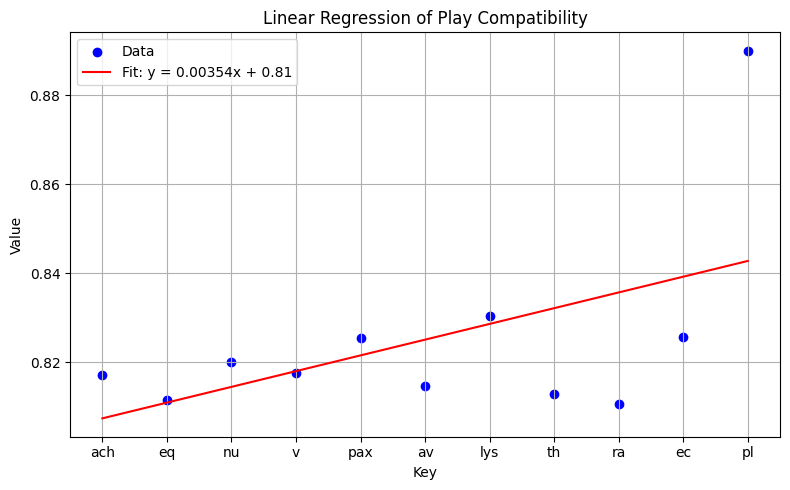

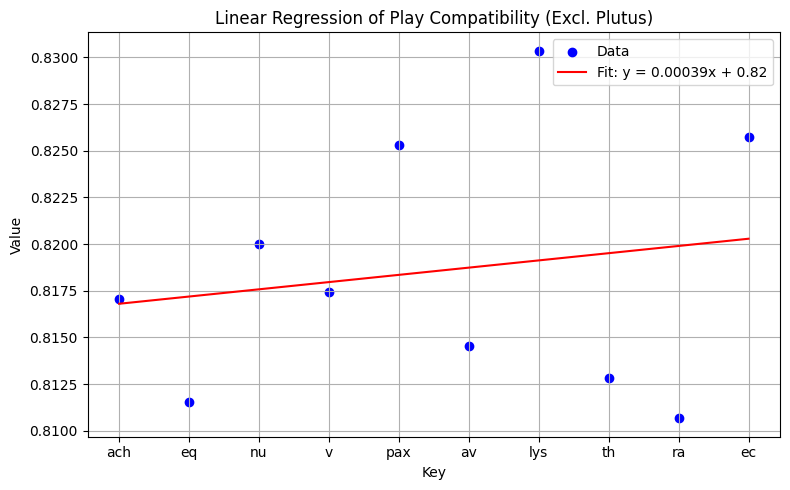

In [11]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def linear_regression_plays(data, title):
    # Convert string keys to numerical indices
    x = list(range(len(data)))  # or use: list(enumerate(data))[i][0] if needed
    y = list(data.values())
    labels = list(data.keys())

    # Linear regression
    slope, intercept, *_ = linregress(x, y)
    regression_line = [slope * xi + intercept for xi in x]

    # Plot
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label='Data', color='blue')
    plt.plot(x, regression_line, label=f'Fit: y = {slope:.5f}x + {intercept:.2f}', color='red')

    # Replace x-axis ticks with original labels
    plt.xticks(ticks=x, labels=labels)
    plt.xlabel('Key')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example dict with string keys
data = play_dict
linear_regression_plays(data, 'Linear Regression of Play Compatibility')

data = {k: v for k, v in data.items() if k != 'pl'}
linear_regression_plays(data, 'Linear Regression of Play Compatibility (Excl. Plutus)')



### Intra-Play Arcs

### Canticum

Number of cantica: 77


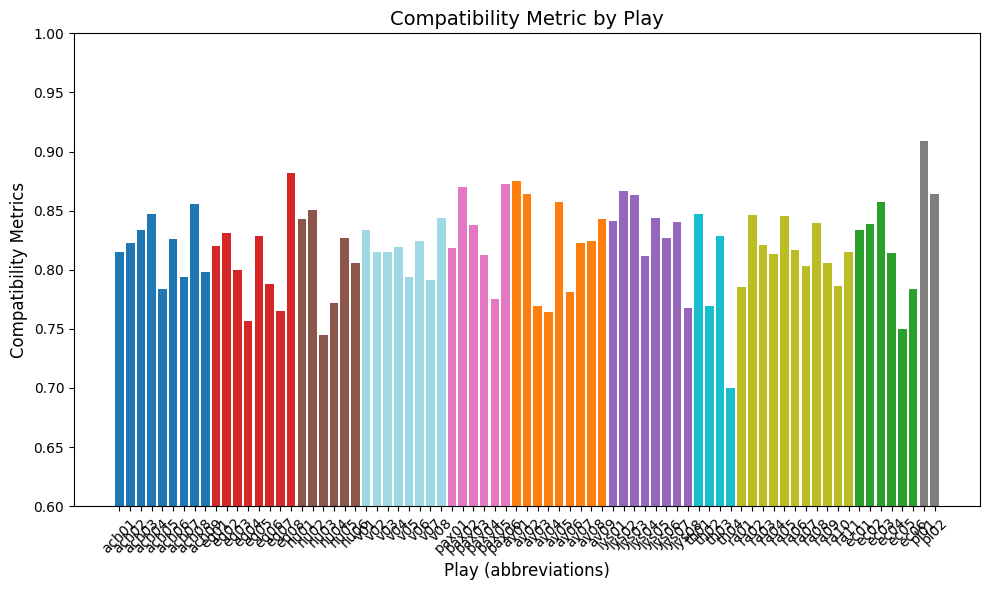

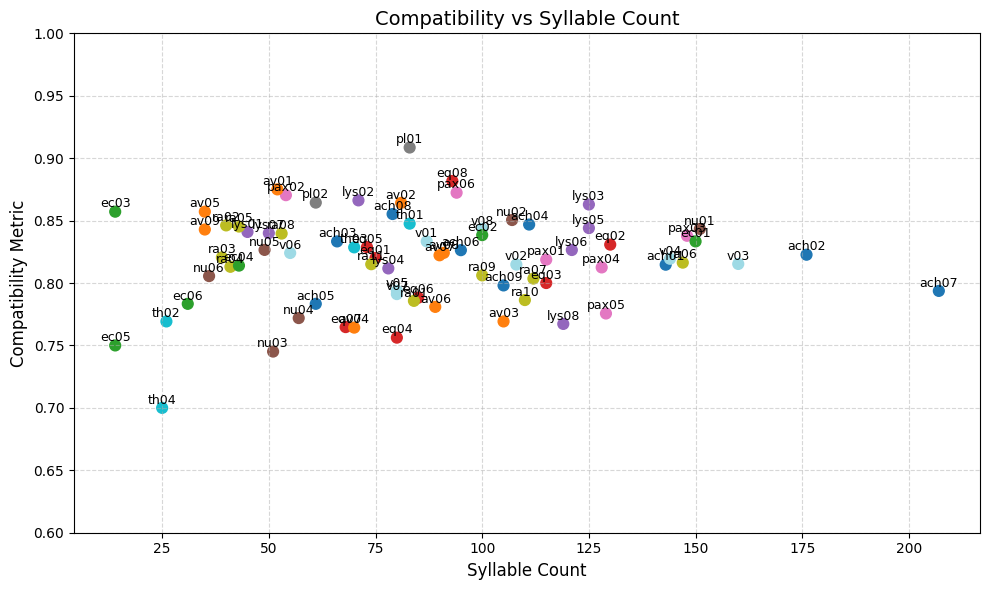

In [10]:
from src.comp import compatibility_canticum, compatibility_ratios_to_stats
from src.plot.plot_cantica import plot_dict
from src.plot.plot_2d import plot_dict_as_points
from src.utils.utils import abbreviations, get_canticum_ids, get_syll_count

def prepare_compatibility_stat_canticum(canticum_id):
    list = compatibility_canticum(f'data/compiled/responsion_{canticum_id[:-2]}_compiled.xml', canticum_id)
    return compatibility_ratios_to_stats(list)

canticum_ids = get_canticum_ids(abbreviations)
syll_counts = get_syll_count(canticum_ids)

canticum_dict = {}
for canticum_id in canticum_ids:
    canticum_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

print("Number of cantica:", len(canticum_ids))
plot_dict(canticum_dict, y_start=0.6, y_end=1)
plot_dict_as_points(canticum_dict, syll_counts, y_start=0.6, y_end=1)




#### By Strophicity

Antistrophic compatibility: 0.8215367447792125
Polystrophic compatibility: 0.7932942708333334


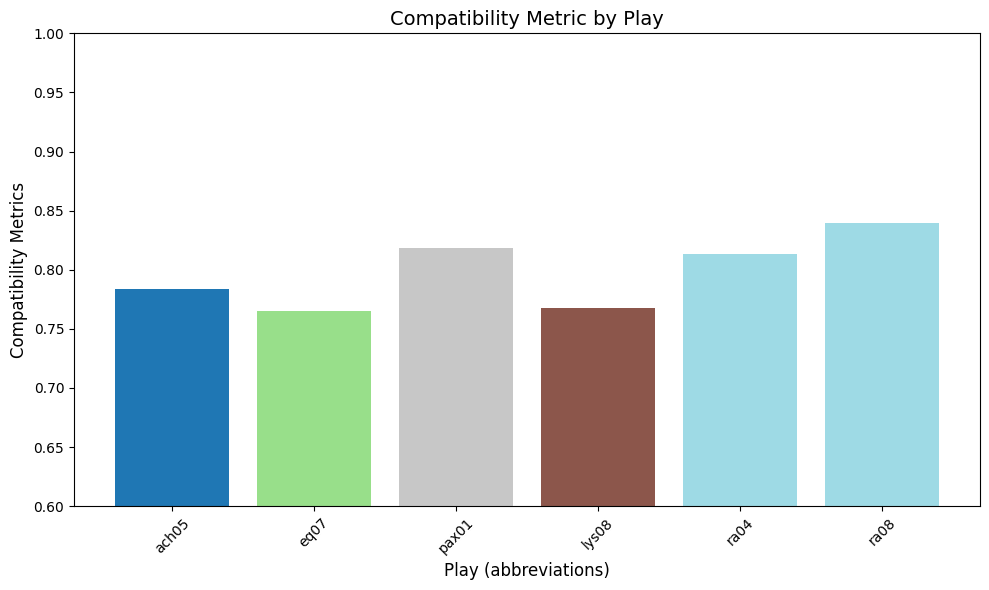

In [3]:
from src.comp import compatibility_canticum, compatibility_ratios_to_stats, compatibility_strophicity
from src.plot.plot_cantica import plot_dict
from src.plot.plot_2d import plot_dict_as_points
from src.utils.utils import abbreviations, get_canticum_ids, get_strophicity, get_syll_count

def prepare_compatibility_stat_canticum(canticum_id):
    list = compatibility_canticum(f'data/compiled/responsion_{canticum_id[:-2]}_compiled.xml', canticum_id)
    return compatibility_ratios_to_stats(list)

antistrophic_stat = compatibility_ratios_to_stats(compatibility_strophicity(f'data/compiled', mode="antistrophic"))
polystrophic_stat = compatibility_ratios_to_stats(compatibility_strophicity(f'data/compiled', mode="polystrophic"))
print(f'Antistrophic compatibility: {antistrophic_stat}')
print(f'Polystrophic compatibility: {polystrophic_stat}')

polystrophic_ids, antistrophic_ids = get_strophicity(abbreviations)
syll_counts_polystrophic = get_syll_count(polystrophic_ids)
syll_counts_antistrophic = get_syll_count(antistrophic_ids)

polystrophic_dict = {}
for canticum_id in polystrophic_ids:
    polystrophic_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

antistrophic_dict = {}
for canticum_id in antistrophic_ids:
    antistrophic_dict[canticum_id] = prepare_compatibility_stat_canticum(canticum_id)

plot_dict(polystrophic_dict, y_start=0.6, y_end=1)


## Accentual Responsion

### Canticum

In [29]:
from lxml import etree
from src.stats import accentually_responding_syllables_of_strophes_polystrophic, count_all_accents_canticum
from src.utils.utils import abbreviations, get_canticum_ids

canticum_ids = get_canticum_ids(abbreviations)

for canticum in canticum_ids:
    infix = canticum[:-2]
    xml_file = f"data/compiled/responsion_{infix}_compiled.xml"
    tree = etree.parse(xml_file)

    strophes = tree.xpath(f'//*[self::strophe or self::antistrophe][@responsion="{canticum}"]')
    accent_maps = accentually_responding_syllables_of_strophes_polystrophic(*strophes)

    total_accent_sums = count_all_accents_canticum(tree, canticum)
    accent_responsion_counts = {
        'acute': sum(len(d) for d in accent_maps[0]),
        'grave': sum(len(d) for d in accent_maps[1]),
        'circumflex': sum(len(d) for d in accent_maps[2])
    }

    acute_stat = accent_responsion_counts['acute'] / total_accent_sums['acute'] if total_accent_sums['acute'] > 0 else 0
    grave_stat = accent_responsion_counts['grave'] / total_accent_sums['grave'] if total_accent_sums['grave'] > 0 else 0
    circumflex_stat = accent_responsion_counts['circumflex'] / total_accent_sums['circumflex'] if total_accent_sums['circumflex'] > 0 else 0

    print(f"Statistics for {canticum}:")
    print(f"  Acute: {accent_responsion_counts['acute']} / {total_accent_sums['acute']} = {acute_stat:.2f}")
    print(f"  Grave: {accent_responsion_counts['grave']} / {total_accent_sums['grave']} = {grave_stat:.2f}")
    print(f"  Circumflex: {accent_responsion_counts['circumflex']} / {total_accent_sums['circumflex']} = {circumflex_stat:.2f}")
    print()



Statistics for ach01:
  Acute: 18 / 62 = 0.29
  Grave: 4 / 27 = 0.15
  Circumflex: 8 / 32 = 0.25

Statistics for ach02:
  Acute: 18 / 56 = 0.32
  Grave: 4 / 19 = 0.21
  Circumflex: 4 / 19 = 0.21

Statistics for ach03:
  Acute: 12 / 31 = 0.39
  Grave: 0 / 11 = 0.00
  Circumflex: 6 / 12 = 0.50

Statistics for ach04:
  Acute: 10 / 41 = 0.24
  Grave: 0 / 25 = 0.00
  Circumflex: 8 / 18 = 0.44

Statistics for ach05:
  Acute: 0 / 28 = 0.00
  Grave: 0 / 12 = 0.00
  Circumflex: 0 / 16 = 0.00

Statistics for ach06:
  Acute: 24 / 49 = 0.49
  Grave: 4 / 17 = 0.24
  Circumflex: 2 / 17 = 0.12

Statistics for ach07:
  Acute: 26 / 101 = 0.26
  Grave: 4 / 44 = 0.09
  Circumflex: 10 / 33 = 0.30

Statistics for ach08:
  Acute: 12 / 27 = 0.44
  Grave: 0 / 15 = 0.00
  Circumflex: 4 / 24 = 0.17

Statistics for ach09:
  Acute: 16 / 50 = 0.32
  Grave: 0 / 17 = 0.00
  Circumflex: 2 / 15 = 0.13

Statistics for eq01:
  Acute: 6 / 27 = 0.22
  Grave: 8 / 22 = 0.36
  Circumflex: 8 / 19 = 0.42

Statistics for eq02:


## Barys Responsion

## Relationship Between the 3 Metrics

## Significance